![Logo da Resilia](https://www.resilia.com.br/wp-content/uploads/2021/08/logo.png)

-- Contexto deste Projeto :
Nossa equipe equipe foi escalada pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma
análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.
A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil; realiza e divulga pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos; promove estudos sobre o potencial petrolífero e o desenvolvimento do setor; entre outras atividades.
Realizaremos a análise exploratória a partir das fontes de dados disponíveis no portal gov.br. Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C) contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.



In [ ]:
#importando bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

--- Detalhes do projeto:

● A análise deve responder às seguintes perguntas:

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts SQL


1 - Existe alguma bandeira que atua em mais de um estado ?
2 - Qual bandeira vendeu Gasolina Comum mais barata em Julho de 2023 ?
3 - QUAL FOI A BANDEIRA QUE VENDEU O ETANOL MAIS BARATO EM JULHO  ?

- Importando dados dos mes de 05(MAIO)de 2023 para realizar a analise comparativa com os meses 06(JUNHO) e 07(JULHO) de 2023.

In [ ]:
mes05 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv', sep= ';')
mes05.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes06 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv', delimiter=';')
mes06.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes07 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv', delimiter=';')# utilizado o comando delimitador pois nao lia o csv porque o delimitador dele era ponto e virgula
mes07.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']

- Criando copia dos dados e das colunas que iremos utilizar

In [ ]:
copia_mes05 = mes05[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes06 = mes06[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes07 = mes07[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()

- Filtrando por Produto

In [ ]:
gasolinaComumMaio = copia_mes05[copia_mes05['Produto'] == 'GASOLINA'].copy()
gasolinaComumJunho = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()
gasolinaComumJulho = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()
gasolinaAditivadaMaio = copia_mes05[copia_mes05['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJunho = copia_mes06[copia_mes06['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJulho = copia_mes07[copia_mes07['Produto'] == 'GASOLINA ADITIVADA'].copy()
etanolMaio = copia_mes05[copia_mes05['Produto'] == 'ETANOL'].copy()
etanolJunho = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()
etanolJulho = copia_mes07[copia_mes07['Produto'] == 'ETANOL'].copy()



In [ ]:
gasolinaComumMaio2 = copia_mes05[copia_mes05['Produto'] == 'GASOLINA'].copy()
gasolinaComumJunho2 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()
gasolinaComumJulho2 = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()
gasolinaAditivadaMaio2 = copia_mes05[copia_mes05['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJunho2 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJulho2 = copia_mes07[copia_mes07['Produto'] == 'GASOLINA ADITIVADA'].copy()
etanolMaio2 = copia_mes05[copia_mes05['Produto'] == 'ETANOL'].copy()
etanolJunho2 = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()
etanolJulho2 = copia_mes07[copia_mes07['Produto'] == 'ETANOL'].copy()


- Obtendo a Media da Gasolina Comum , Gasolina Aditivada e Etanol em Maio/ 2023

In [ ]:
# Remover linhas com valores não numéricos na coluna 'Valor de Venda'
gasolinaComumMaio['Valor de Venda'] = pd.to_numeric(gasolinaComumMaio['Valor de Venda'], errors='coerce')
gasolinaComumMaio.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaComumJunho['Valor de Venda'] = pd.to_numeric(gasolinaComumJunho['Valor de Venda'], errors='coerce')
gasolinaComumJunho.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaComumJulho['Valor de Venda'] = pd.to_numeric(gasolinaComumJulho['Valor de Venda'], errors='coerce')
gasolinaComumJulho.dropna(subset=['Valor de Venda'], inplace=True)

gasolinaAditivadaMaio['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaMaio['Valor de Venda'], errors='coerce')
gasolinaAditivadaMaio.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaAditivadaJunho['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaJunho['Valor de Venda'], errors='coerce')
gasolinaAditivadaJunho.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaAditivadaJulho['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaJulho['Valor de Venda'], errors='coerce')
gasolinaAditivadaJulho.dropna(subset=['Valor de Venda'], inplace=True)

etanolMaio['Valor de Venda'] = pd.to_numeric(etanolMaio['Valor de Venda'], errors='coerce')
etanolMaio.dropna(subset=['Valor de Venda'], inplace=True)
etanolJunho['Valor de Venda'] = pd.to_numeric(etanolJunho['Valor de Venda'], errors='coerce')
etanolJunho.dropna(subset=['Valor de Venda'], inplace=True)
etanolJulho['Valor de Venda'] = pd.to_numeric(etanolJulho['Valor de Venda'], errors='coerce')
etanolJulho.dropna(subset=['Valor de Venda'], inplace=True)

# Calcular a média dos preços de venda após a limpeza
mediaGasolinaComumMaio = gasolinaComumMaio['Valor de Venda'].mean()
mediaGasolinaComumJunho = gasolinaComumJunho['Valor de Venda'].mean()
mediaGasolinaComumJulho = gasolinaComumJulho['Valor de Venda'].mean()

mediaGasolinaAditivadaMaio = gasolinaAditivadaMaio['Valor de Venda'].mean()
mediaGasolinaAditivadaJunho = gasolinaAditivadaJunho['Valor de Venda'].mean()
mediaGasolinaAditivadaJulho = gasolinaAditivadaJulho['Valor de Venda'].mean()

mediaEtanolMaio = etanolMaio['Valor de Venda'].mean()
mediaEtanolJunho = etanolJunho['Valor de Venda'].mean()
mediaEtanolJulho = etanolJulho['Valor de Venda'].mean()
# Formatando valores para exibicao
mediaFormatadaGasolinaComumMaio = "{:.2f}".format(mediaGasolinaComumMaio)
mediaFormatadaGasolinaComumJunho = "{:.2f}".format(mediaGasolinaComumJunho)
mediaFormatadaGasolinaComumJulho = "{:.2f}".format(mediaGasolinaComumJulho)

mediaFormatadaGasolinaAditivadaMaio = "{:.2f}".format(mediaGasolinaAditivadaMaio)
mediaFormatadaGasolinaAditivadaJunho = "{:.2f}".format(mediaGasolinaAditivadaJunho)
mediaFormatadaGasolinaAditivadaJulho = "{:.2f}".format(mediaGasolinaAditivadaJulho)

mediaFormatadaEtanolJunho = "{:.2f}".format(mediaEtanolJunho)
mediaFormatadaEtanolMaio = "{:.2f}".format(mediaEtanolMaio)
# Exibindo
print(f"A média dos preços de venda da Gasolina Comum em Maio é: {mediaFormatadaGasolinaComumMaio}")
print(f"A média dos preços de venda da Gasolina Comum em Junho é: {mediaFormatadaGasolinaComumJunho}")
print(f"A média dos preços de venda da Gasolina Comum em Julho é: {mediaFormatadaGasolinaComumJulho}")
print(f"A média dos preços de venda da Gasolina Aditivada em Maio é: {mediaFormatadaGasolinaAditivadaMaio}")
print(f"A média dos preços de venda da Gasolina Aditivada em Junho é: {mediaFormatadaGasolinaAditivadaJunho}")
print(f"A média dos preços de venda da Gasolina Aditivada em Julho é: {mediaFormatadaGasolinaAditivadaJulho}")
print(f"A média dos preços de venda do Etanol em Maio é: {mediaFormatadaEtanolMaio}")
print(f"A média dos preços de venda do Etanol em Junho é: {mediaFormatadaEtanolJunho}")
print(f"A média dos preços de venda do Etanol em Julho é: {mediaEtanolJulho:.2f}")



A média dos preços de venda da Gasolina Comum em Maio é: 5.77
A média dos preços de venda da Gasolina Comum em Junho é: 5.75
A média dos preços de venda da Gasolina Comum em Julho é: 5.77
A média dos preços de venda da Gasolina Aditivada em Maio é: 5.41
A média dos preços de venda da Gasolina Aditivada em Junho é: 5.67
A média dos preços de venda da Gasolina Aditivada em Julho é: 5.78
A média dos preços de venda do Etanol em Maio é: 4.38
A média dos preços de venda do Etanol em Junho é: 4.20
A média dos preços de venda do Etanol em Julho é: 4.12


In [ ]:
data = {
    'Combustível': ['Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol'],
    'Mês': ['Maio', 'Maio', 'Maio', 'Junho', 'Junho', 'Junho', 'Julho', 'Julho', 'Julho'],
    'Preço Médio': [5.77, 5.41, 4.38, 5.75, 5.67, 4.20, 5.77, 5.78, 4.12]
}

df = pd.DataFrame(data)
print(df)

          Combustível    Mês  Preço Médio
0            Gasolina   Maio         5.77
1  Gasolina Aditivada   Maio         5.41
2              Etanol   Maio         4.38
3            Gasolina  Junho         5.75
4  Gasolina Aditivada  Junho         5.67
5              Etanol  Junho         4.20
6            Gasolina  Julho         5.77
7  Gasolina Aditivada  Julho         5.78
8              Etanol  Julho         4.12


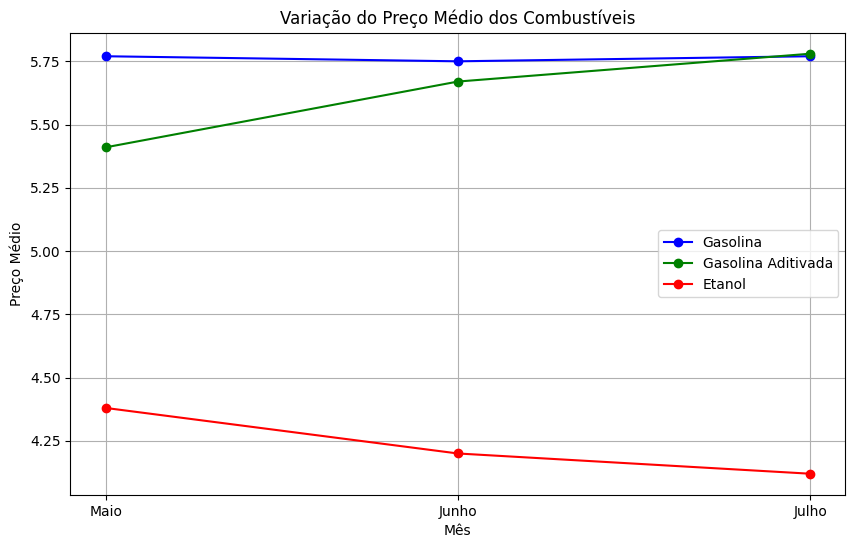

In [ ]:
# Criando um gráfico de linhas
plt.figure(figsize=(10, 6))
combustiveis = df['Combustível'].unique()
cores = ['b', 'g', 'r']

for idx, combustivel in enumerate(combustiveis):
    df_combustivel = df[df['Combustível'] == combustivel]
    plt.plot(df_combustivel['Mês'], df_combustivel['Preço Médio'], label=combustivel, color=cores[idx], marker='o')

plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.title('Variação do Preço Médio dos Combustíveis')
plt.legend()
plt.grid(True)
plt.show()

Com Base nestes Valores encontraremos a resposta para a pergunta 1

- Pergunta 1

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

- RESPOSTA

Com base nestes dados , podemos observar o comportamento dos preços dos combustíveis durante os dois meses citados (Maio e Junho). Vamos analisar a tendência para cada tipo de combustível:

Gasolina: O preço médio da gasolina apresentou uma pequena variação de 5.77 em Maio para 5.75 em Junho, indicando uma leve diminuição.

Gasolina Aditivada: O preço médio da gasolina aditivada teve um aumento de 5.41 em Maio para 5.67 em Junho, indicando uma tendência de aumento.

Etanol: O preço médio do etanol diminuiu de 4.38 em Maio para 4.20 em Junho, o que sugere uma tendência de queda.

Portanto, com base nesses dados, podemos dizer que houve uma tendência de diminuição no preço médio da gasolina, um aumento no preço médio da gasolina aditivada e uma tendência de queda no preço médio do etanol durante os dois meses citados.

Vamos analisar a tendência de junho para julho com base nestes dados :

Gasolina: O preço médio da gasolina apresentou uma pequena variação de 5.75 em Junho para 5.77 em Julho, indicando uma leve tendência de aumento.

Gasolina Aditivada: O preço médio da gasolina aditivada teve um aumento mais significativo, de 5.67 em Junho para 5.78 em Julho, indicando uma tendência de aumento.

Etanol: O preço médio do etanol diminuiu de 4.20 em Junho para 4.12 em Julho, sugerindo uma tendência de queda.

Portanto, com base nesses dados, podemos dizer que houve uma leve tendência de aumento nos preços médios da gasolina e gasolina aditivada, enquanto o preço médio do etanol teve uma tendência de queda de junho para julho.

2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [ ]:
data = {
    'Combustível': ['Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol'],
    'Mês': ['Maio', 'Maio', 'Maio', 'Junho', 'Junho', 'Junho', 'Julho', 'Julho', 'Julho'],
    'Preço Médio': [5.77, 5.41, 4.38, 5.75, 5.67, 4.20, 5.77, 5.78, 4.12]
}

df = pd.DataFrame(data)
print(df)

          Combustível    Mês  Preço Médio
0            Gasolina   Maio         5.77
1  Gasolina Aditivada   Maio         5.41
2              Etanol   Maio         4.38
3            Gasolina  Junho         5.75
4  Gasolina Aditivada  Junho         5.67
5              Etanol  Junho         4.20
6            Gasolina  Julho         5.77
7  Gasolina Aditivada  Julho         5.78
8              Etanol  Julho         4.12


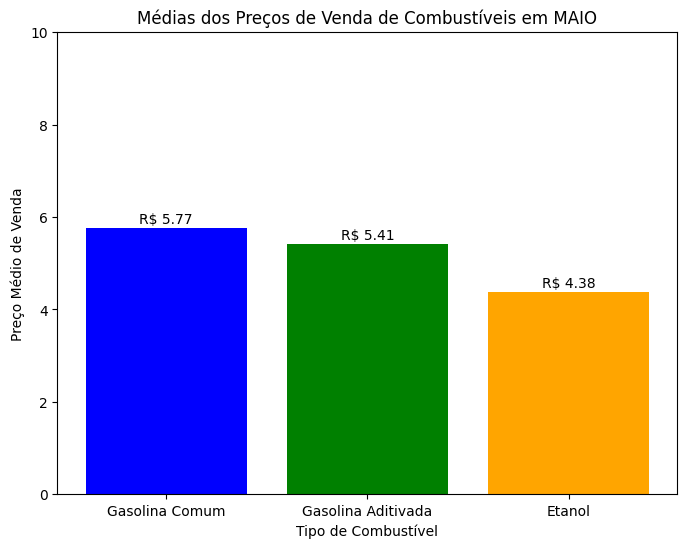

In [ ]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.77, 5.41, 4.38]
# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em MAIO')
# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

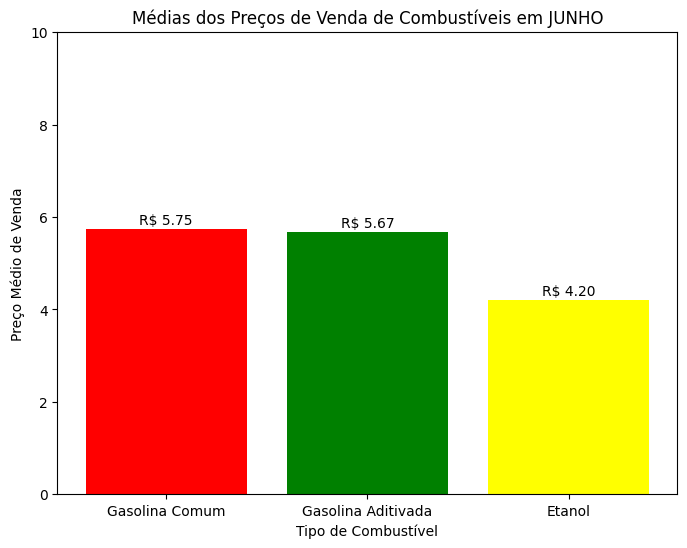

In [ ]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.75, 5.67, 4.20]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['red', 'green', 'yellow'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em JUNHO')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

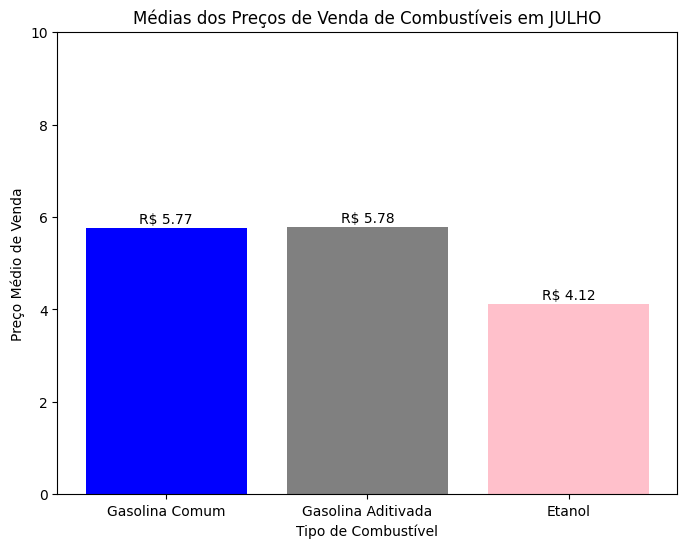

In [ ]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.77, 5.78, 4.12]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'grey', 'pink'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em JULHO')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

- PERGUNTA 3

- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [ ]:
#código para calcular o preço médio da gasolina comum por estado em Maio
grouped = gasolinaComumMaio2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros_maio = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_maio.round(2)


In [ ]:
cincoEstadosGasolinaComumMaisCaraMaio = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaComumMaisCaraMaio

EstadoSigla
AM    6.16
AC    6.15
CE    5.70
RR    5.64
AL    5.64
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio da gasolina Aditivada por estado em Maio
grouped = gasolinaAditivadaMaio2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_aditivada_mais_caros_maio = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_aditivada_mais_caros_maio.round(2)

In [ ]:
cincoEstadosGasolinaAditivadaMaisCaraMaio = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaAditivadaMaisCaraMaio

EstadoSigla
AM    6.38
AC    6.09
AL    5.93
CE    5.72
RJ    5.68
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio do Etanol por estado em Maio
grouped = etanolMaio2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_etanol_mais_caros_maio = grouped.sort_values(ascending=False).head(27) /100
estados_etanol_mais_caros_maio.round(2)

In [ ]:
cincoEstadosEtanolMaisCaroMaio = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosEtanolMaisCaroMaio

EstadoSigla
AP    5.19
RR    5.07
RO    4.78
AC    4.78
RS    4.75
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio da gasolina comum por estado em Junho
grouped = gasolinaComumJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros_junho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_junho.round(2)

In [ ]:
cincoEstadosGasolinaComumMaisCaraJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaComumMaisCaraJunho

EstadoSigla
AM    5.97
RO    5.82
AC    5.72
RN    5.64
ES    5.55
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio da gasolina Aditivada por estado em Junho
grouped = gasolinaAditivadaJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_aditivada_mais_caros_junho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_aditivada_mais_caros_junho.round(2)

In [ ]:
cincoEstadosGasolinaAditivadaMaisCaraJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaAditivadaMaisCaraJunho

EstadoSigla
AM    6.10
AC    5.92
RN    5.77
ES    5.67
AL    5.58
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio do Etanol por estado em Junho
grouped = etanolJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_etanol_mais_caros_junho = grouped.sort_values(ascending=False).head(27) /100
estados_etanol_mais_caros_junho.round(2)

In [ ]:
cincoEstadosEtanolMaisCaroJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosEtanolMaisCaroJunho

EstadoSigla
AP    5.19
RR    5.07
RO    4.78
AC    4.78
RS    4.75
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio da gasolina comum por estado em Julho
grouped = gasolinaComumJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros_julho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_julho.round(2)

In [ ]:
cincoEstadosGasolinaComumMaisCaraJulho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaComumMaisCaraJunho

EstadoSigla
AM    5.97
RO    5.82
AC    5.72
RN    5.64
ES    5.55
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio da gasolina Aditivada por estado em Julho
grouped = gasolinaAditivadaJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_aditivada_mais_caros_julho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_julho.round(2)

In [ ]:
cincoEstadosGasolinaAditivadaMaisCaraJulho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaAditivadaMaisCaraJulho

EstadoSigla
AM    6.39
CE    5.95
ES    5.90
RO    5.88
RR    5.86
Name: Preço Médio, dtype: float64

In [ ]:
#código para calcular o preço médio do Etanol por estado em Julho
grouped = etanolJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_etanol_mais_caros_julho = grouped.sort_values(ascending=False).head(27) /100
estados_etanol_mais_caros_julho.round(2)

In [ ]:
cincoEstadosEtanolMaisCaroJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosEtanolMaisCaroJunho

EstadoSigla
AP    5.31
RR    5.15
RO    5.04
RS    4.77
AM    4.69
Name: Preço Médio, dtype: float64

- PERGUNTA 4

4. Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
#código para calcular o preço médio da gasolina comum por estado em Junho
grouped = gasolinaComumJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Comum por Estado em Junho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
#código para calcular o preço médio da gasolina comum por estado em Julho
grouped = gasolinaComumJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Comum por Estado em Julho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
#código para calcular o preço médio da gasolina Aditivada por estado em Junho
grouped = gasolinaAditivadaJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Aditivada por Estado em Junho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
#código para calcular o preço médio da gasolina Aditivada por estado em Julho
grouped = gasolinaAditivadaJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Aditivada por Estado em Julho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
#código para calcular o preço médio do Etanol por estado em Junho
grouped = etanolJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Etanol': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'] / 100
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Etanol'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Etanol (R$)')
plt.title('Preço Médio do Etanol por Estado em Junho')
plt.xticks(rotation=45)
plt.tight_layout()


# Exibindo o gráfico
plt.show()




In [ ]:
#código para calcular o preço médio do Etanol por estado em Junho
grouped = etanolJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Etanol': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'] / 100
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Etanol'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Etanol (R$)')
plt.title('Preço Médio do Etanol por Estado em Julho')
plt.xticks(rotation=45)
plt.tight_layout()


# Exibindo o gráfico
plt.show()




- Pergunta 5

5. Qual o município que possui o menor preço para a gasolina e para o etanol?

- Limpando dados para filtrar desvio padrao

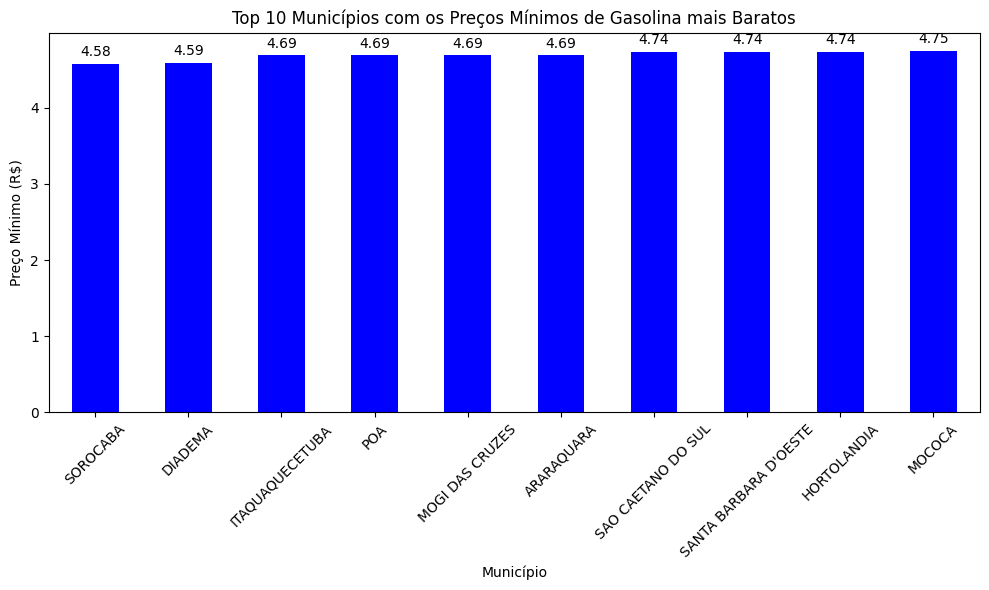

In [ ]:
# Código para calcular o preço mínimo da gasolina comum por Município
grouped = gasolinaComumJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_baratos_filtrados.plot(kind='bar', color='blue')
plt.title('Top 10 Municípios com os Preços Mínimos de Gasolina mais Baratos')
plt.xlabel('Município')
plt.ylabel('Preço Mínimo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

plt.tight_layout()

# Exibindo o gráfico
plt.show()

Municipio em julho com a Gasolina Comum mais barata é SOROCABA R$ 4.58

In [ ]:
# Código para calcular o preço mínimo da gasolina comum por Município em junho
grouped = gasolinaComumJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina comum em junho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

In [ ]:
# Código para calcular o preço mínimo da gasolina aditivada por Município em junho
grouped = gasolinaAditivadaJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina aditivada em junho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

In [ ]:
# Código para calcular o preço mínimo da gasolina aditivada por Município em julho
grouped = gasolinaAditivadaJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina aditivada em julho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

In [ ]:
# Código para calcular o preço mínimo do Etanol por Município em junho
grouped = etanolJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos do Etanol em junho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

In [ ]:
# Código para calcular o preço mínimo do Etanol por Município em julho
grouped = etanolJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos do Etanol em julho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

- Pergunta 06

6. Qual o município que possui o maior preço para a gasolina e para o etanol?

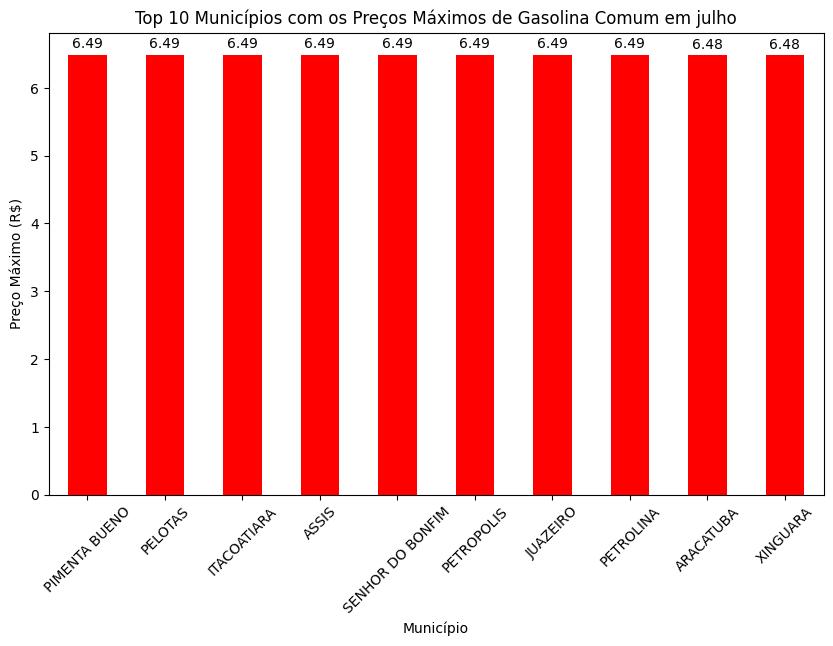

In [ ]:
# Código para calcular o preço máximo da gasolina comum por Município
grouped = gasolinaComumJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='red')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Comum em julho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

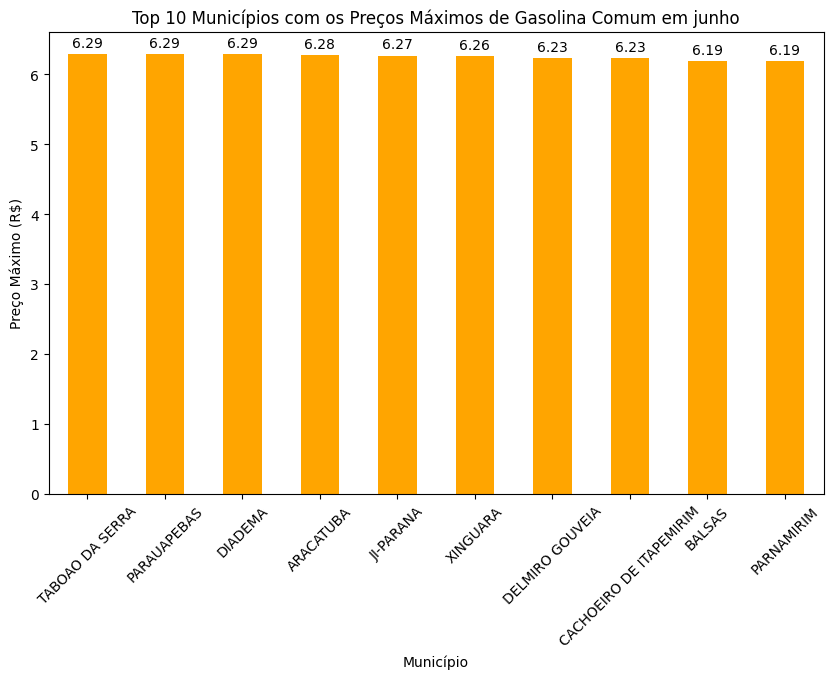

In [ ]:
# Código para calcular o preço máximo da gasolina comum por Município
grouped = gasolinaComumJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='orange')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Comum em junho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

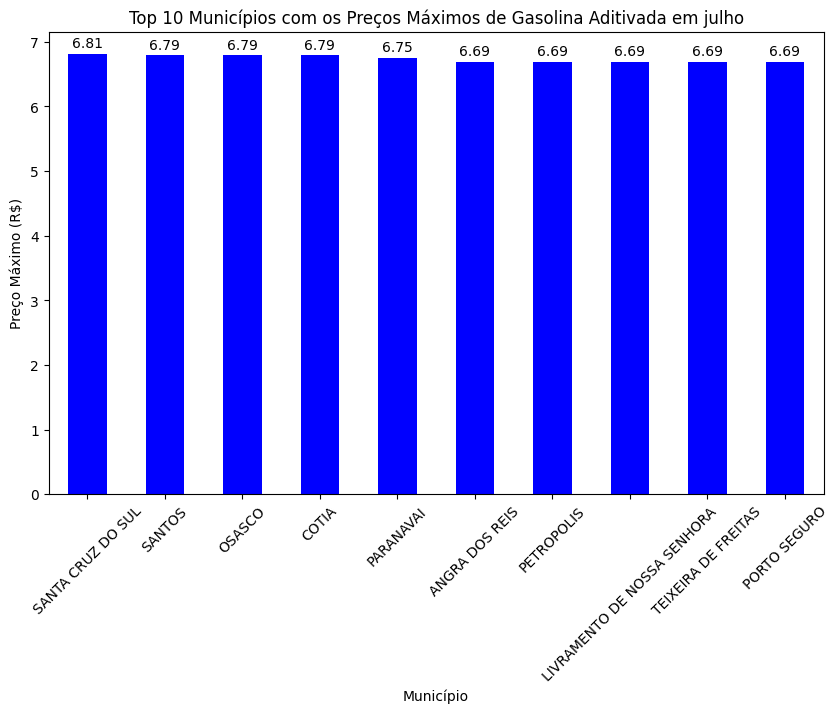

In [ ]:
# Código para calcular o preço máximo da gasolina aditivada por Município em junho
grouped = gasolinaAditivadaJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='blue')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Aditivada em julho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

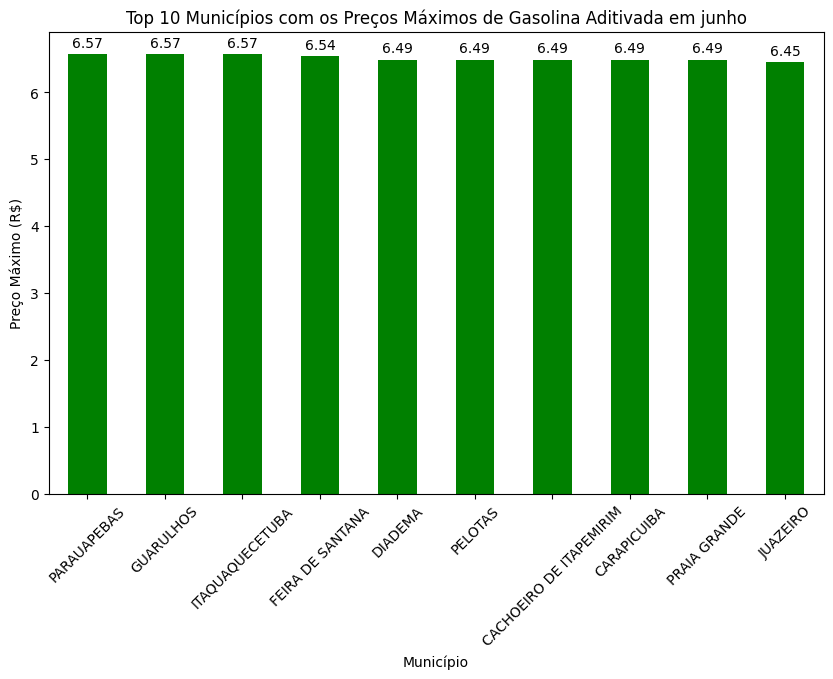

In [ ]:
# Código para calcular o preço máximo da gasolina aditivada por Município em junho
grouped = gasolinaAditivadaJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='green')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Aditivada em junho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

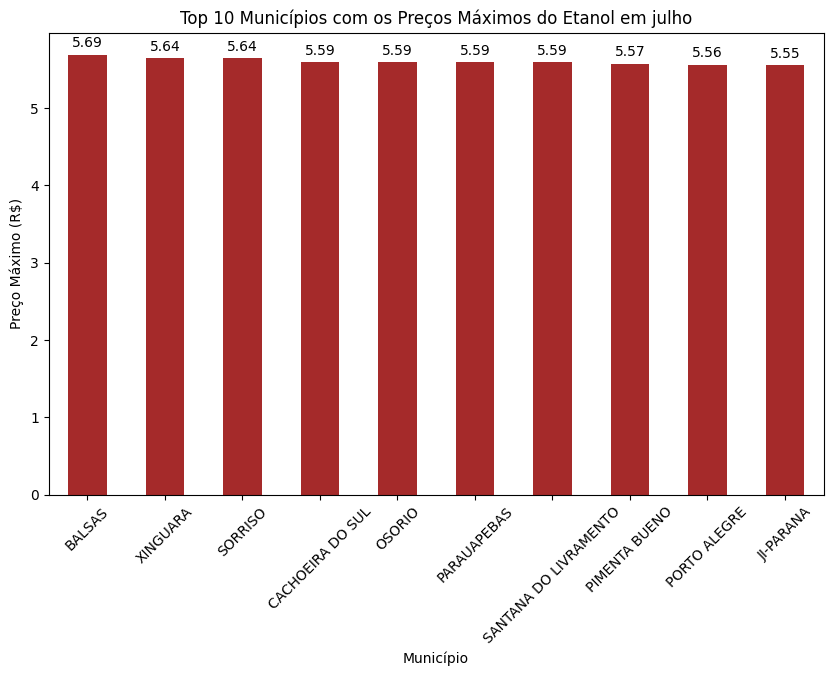

In [ ]:
# Código para calcular o preço máximo da gasolina aditivada por Município em julho
grouped = etanolJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_etanol_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados[municipios_etanol_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_etanol_mais_caros_filtrados.plot(kind='bar', color='brown')
plt.title('Top 10 Municípios com os Preços Máximos do Etanol em julho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

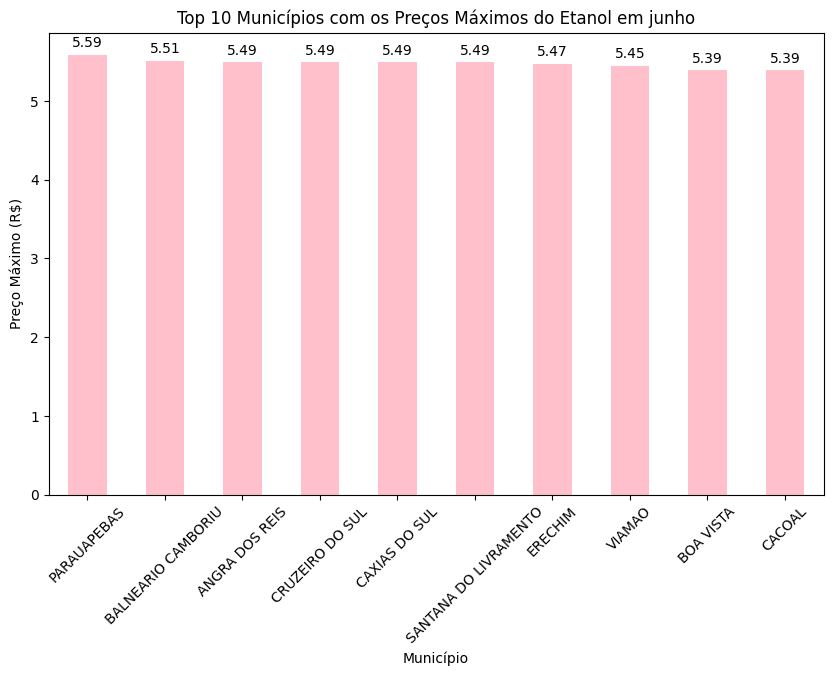

In [ ]:
# Código para calcular o preço máximo da gasolina aditivada por Município em junho
grouped = etanolJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_etanol_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados[municipios_etanol_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_etanol_mais_caros_filtrados.plot(kind='bar', color='pink')
plt.title('Top 10 Municípios com os Preços Máximos do Etanol em junho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

7. Qual a região que possui o maior valor médio da gasolina?

Criando copia para executar os codigos

In [ ]:
gasolinaComumJulho3 = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()

In [ ]:
# Filtrando os dados apenas para gasolina
gasolina_data4 = gasolinaComumJulho3[gasolinaComumJulho3['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data4['Valor de Venda'] = pd.to_numeric(gasolina_data4['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Calculando o valor médio da gasolina por região
valor_medio_por_regiao = gasolina_data4.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o maior valor médio da gasolina
regiao_maior_valor_medio = valor_medio_por_regiao.idxmax()
valor_maior_valor_medio = valor_medio_por_regiao.max()/100# Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o maior valor médio da gasolina em julho é {regiao_maior_valor_medio} com valor médio de R$ {valor_maior_valor_medio:.2f}")

A região com o maior valor médio da gasolina em julho é NE com valor médio de R$ 5.60


In [ ]:
gasolinaComumJunho4 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()

In [ ]:
# Filtrando os dados apenas para gasolina
gasolina_data5 = gasolinaComumJunho4[gasolinaComumJunho4['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data5['Valor de Venda'] = pd.to_numeric(gasolina_data5['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Calculando o valor médio da gasolina por região
valor_medio_por_regiao3 = gasolina_data5.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o maior valor médio da gasolina
regiao_maior_valor_medio3 = valor_medio_por_regiao3.idxmax()
valor_maior_valor_medio3 = valor_medio_por_regiao3.max()/100# Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o maior valor médio da gasolina em junho é {regiao_maior_valor_medio3} com valor médio de R$ {valor_maior_valor_medio3:.2f}")

A região com o maior valor médio da gasolina em junho é N com valor médio de R$ 5.45


- Pergunta 8

8. Qual a região que possui o menor valor médio do etanol?

In [ ]:
# Filtrando os dados apenas para etanol
etanol_data = etanolJulho[etanolJulho['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos


# Calculando o valor médio do etanol por região
valor_medio_por_regiao_etanol = etanol_data.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o menor valor médio do etanol
regiao_menor_valor_medio_etanol = valor_medio_por_regiao_etanol.idxmin()
valor_menor_valor_medio_etanol = valor_medio_por_regiao_etanol.min()  # Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o menor valor médio do etanol em Julho é {regiao_menor_valor_medio_etanol} com valor médio de R$ {valor_menor_valor_medio_etanol:.2f}")

A região com o menor valor médio do etanol em Julho é SE com valor médio de R$ 3.83


In [ ]:
# Filtrando os dados apenas para etanol
etanol_data2 = etanolJunho[etanolJunho['Produto'] == 'ETANOL']

# Calculando o valor médio do etanol por região
valor_medio_por_regiao_etanol2 = etanol_data2.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o menor valor médio do etanol
regiao_menor_valor_medio_etanol2 = valor_medio_por_regiao_etanol2.idxmin()
valor_menor_valor_medio_etanol2 = valor_medio_por_regiao_etanol2.min()  # Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o menor valor médio do etanol em Junho é {regiao_menor_valor_medio_etanol2} com valor médio de R$ {valor_menor_valor_medio_etanol2:.2f}")

A região com o menor valor médio do etanol em Junho é NE com valor médio de R$ 4.00


- Pergunta 9

9 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

Para verificar se há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido, podemos calcular o coeficiente de correlação entre essas variáveis. O coeficiente de correlação mede a relação linear entre duas variáveis e varia de -1 a 1. Um valor próximo de 1 indica uma correlação positiva forte, um valor próximo de -1 indica uma correlação negativa forte, e um valor próximo de 0 indica pouca ou nenhuma correlação.

Aqui está um exemplo de como podemos calcular e interpretar a correlação entre o valor da gasolina e a região:

In [ ]:
# Filtrar apenas os dados de gasolina
gasolina_data = mes07[mes07['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_data = gasolina_data.copy()

# Criar um mapeamento numérico para as regiões
regioes_numericas = {regiao: indice for indice, regiao in enumerate(gasolina_data['RegiaoSigla'].unique())}

# Aplicar o mapeamento numérico às regiões
gasolina_data['RegiaoNumerica'] = gasolina_data['RegiaoSigla'].map(regioes_numericas)

# Calcular a correlação entre o valor da gasolina e a região numérica
correlacao_gasolina = gasolina_data['Valor de Venda'].corr(gasolina_data['RegiaoNumerica'])

# Exibir a correlação
print(f"Correlação entre o valor da gasolina e a região: {correlacao_gasolina:.2f}")

Correlação entre o valor da gasolina e a região: 0.08


<ipython-input-149-a7ef375a19ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


In [ ]:
# Filtrar apenas os dados de etanol
etanol_data = mes07[mes07['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
etanol_data = etanol_data.copy()

# Criar um mapeamento numérico para as regiões
regioes_numericas = {regiao: indice for indice, regiao in enumerate(etanol_data['RegiaoSigla'].unique())}

# Aplicar o mapeamento numérico às regiões
etanol_data['RegiaoNumerica'] = etanol_data['RegiaoSigla'].map(regioes_numericas)

# Calcular a correlação entre o valor do etanol e a região numérica
correlacao_etanol = etanol_data['Valor de Venda'].corr(etanol_data['RegiaoNumerica'])

# Exibir a correlação
print(f"Correlação entre o valor do etanol e a região: {correlacao_etanol:.2f}")

Correlação entre o valor do etanol e a região: 0.23


<ipython-input-21-20f173f9f19a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


- Pergunta 10

10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

Para calcular a correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende o combustível, podemos seguir um procedimento semelhante ao que fizemos anteriormente para calcular a correlação com as regiões. Primeiro, precisamos criar um mapeamento numérico para as bandeiras, depois calcular a correlação entre os valores do combustível e as bandeiras numéricas.

In [ ]:
# Filtrar apenas os dados de gasolina
gasolina_data = mes07[mes07['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_data = gasolina_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(gasolina_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
gasolina_data['BandeiraNumerica'] = gasolina_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor da gasolina e a bandeira numérica
correlacao_gasolina = gasolina_data['Valor de Venda'].corr(gasolina_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor da gasolina e a bandeira: {correlacao_gasolina:.2f}")


Correlação entre o valor da gasolina e a bandeira: 0.04


<ipython-input-150-d8aa610e2a7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


In [ ]:
# Filtrar apenas os dados de gasolina aditivada
gasolina_aditivada_data = mes07[mes07['Produto'] == 'GASOLINA ADITIVADA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_aditivada_data['Valor de Venda'] = pd.to_numeric(gasolina_aditivada_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_aditivada_data = gasolina_aditivada_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(gasolina_aditivada_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
gasolina_aditivada_data['BandeiraNumerica'] = gasolina_aditivada_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor da gasolina aditivada e a bandeira numérica
correlacao_gasolina_aditivada = gasolina_aditivada_data['Valor de Venda'].corr(gasolina_aditivada_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor da gasolina aditivada e a bandeira: {correlacao_gasolina_aditivada:.2f}")

Correlação entre o valor da gasolina aditivada e a bandeira: 0.03


<ipython-input-23-cbfe06f23d3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_aditivada_data['Valor de Venda'] = pd.to_numeric(gasolina_aditivada_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


In [ ]:
# Filtrar apenas os dados de etanol
etanol_data = mes07[mes07['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
etanol_data = etanol_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(etanol_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
etanol_data['BandeiraNumerica'] = etanol_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor do etanol e a bandeira numérica
correlacao_etanol = etanol_data['Valor de Venda'].corr(etanol_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor do etanol e a bandeira: {correlacao_etanol:.2f}")

Correlação entre o valor do etanol e a bandeira: 0.08


<ipython-input-24-265f162c4613>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


- Pergunta Extra 1

EXISTE ALGUMA BANDEIRA QUE ATUA EM MAIS DE ALGUM ESTADO ?

In [ ]:
# Verificar se existe alguma bandeira que atua em mais de um estado
bandeiras_por_estado = mes07.groupby('Bandeira')['EstadoSigla'].nunique()

# Filtrar as bandeiras que atuam em mais de um estado
bandeiras_multiestado = bandeiras_por_estado[bandeiras_por_estado > 1]

# Ordenar as bandeiras pelo número de estados em ordem decrescente
bandeiras_multiestado = bandeiras_multiestado.sort_values(ascending=False)

# Exibir as bandeiras que atuam em mais de um estado
if not bandeiras_multiestado.empty:
    print("Bandeiras que atuam em mais de um estado:")
    print(bandeiras_multiestado)
else:
    print("Nenhuma bandeira atua em mais de um estado.")

Bandeiras que atuam em mais de um estado:
Bandeira
VIBRA ENERGIA          27
BRANCA                 27
VIBRA                  27
IPIRANGA               26
RAIZEN                 23
ALESAT                 19
SABBÁ                   7
ATEM' S                 5
RODOIL                  4
DISLUB                  4
IDAZA                   3
CIAPETRO                3
TOTALENERGIES           3
SP                      3
POTENCIAL               3
MAXSUL                  3
EQUADOR                 3
RIO BRANCO              2
SETTA DISTRIBUIDORA     2
PETROBAHIA              2
STANG                   2
TEMAPE                  2
FAN                     2
Name: EstadoSigla, dtype: int64


- Pergunta Extra 2

Qual bandeira vendeu Gasolina Comum mais barata em Julho de 2023 ?

In [ ]:
gasolinaComumJunho5 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()

# Filtrar os dados de gasolina em julho
gasolina_julho = gasolinaComumJunho5  # Substitua pelo seu DataFrame com os dados de gasolina em julho

# Limpar os caracteres não numéricos da coluna 'Valor de Venda'
gasolinaComumJunho5['Valor de Venda'] = gasolinaComumJunho5['Valor de Venda'].str.replace(',', '').str.replace('.', '')

# Filtrar apenas os registros de gasolina
gasolinaComumJunho6 = gasolinaComumJunho5[gasolina_julho['Produto'] == 'GASOLINA']

# Calcular o preço médio da gasolina por bandeira
preco_medio_por_bandeira = gasolinaComumJunho6.groupby('Bandeira')['Valor de Venda'].mean()

# Encontrar a bandeira com o menor preço médio
bandeira_mais_barata = preco_medio_por_bandeira.idxmin()
preco_mais_barato = (preco_medio_por_bandeira.min()/100).round(2)

# Exibir o resultado
print(f"A bandeira que vendeu a gasolina mais barata em julho foi {bandeira_mais_barata} com preço médio de R$ {preco_mais_barato:.2f}")


A bandeira que vendeu a gasolina mais barata em julho foi ROYAL FIC com preço médio de R$ 5.07


<ipython-input-173-d844db5825fb>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gasolinaComumJunho5['Valor de Venda'] = gasolinaComumJunho5['Valor de Venda'].str.replace(',', '').str.replace('.', '')


- Pergunta Extra 3

QUAL FOI A BANDEIRA QUE VENDEU O ETANOL MAIS BARATO EM JULHO ?

In [ ]:
etanolJunho5 = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()

# Filtrar os dados de gasolina em julho
etanol_junho = etanolJunho5  # Substitua pelo seu DataFrame com os dados de gasolina em julho

# Limpar os caracteres não numéricos da coluna 'Valor de Venda'
etanolJunho5['Valor de Venda'] = etanolJunho5['Valor de Venda'].str.replace(',', '').str.replace('.', '')

# Filtrar apenas os registros de gasolina
etanoljunho6 = etanolJunho5[etanol_junho['Produto'] == 'ETANOL']

# Calcular o preço médio da gasolina por bandeira
preco_medio_por_bandeira2 = etanoljunho6.groupby('Bandeira')['Valor de Venda'].mean()

# Encontrar a bandeira com o menor preço médio
bandeira_mais_barata2 = preco_medio_por_bandeira2.idxmin()
preco_mais_barato2 = (preco_medio_por_bandeira2.min()/100).round(2)

# Exibir o resultado
print(f"A bandeira que vendeu o Etanol mais barata em julho foi {bandeira_mais_barata2} com preço médio de R$ {preco_mais_barato2:.2f}")

A bandeira que vendeu o Etanol mais barata em julho foi ROYAL FIC com preço médio de R$ 3.49


<ipython-input-182-d0abcde12b65>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  etanolJunho5['Valor de Venda'] = etanolJunho5['Valor de Venda'].str.replace(',', '').str.replace('.', '')


O cálculo básico para se descobrir se o álcool é vantajoso ou não em relação à gasolina é simples. Basta dividir o preço do litro do álcool pelo da gasolina. Se o resultado for inferior a 0,7, use álcool. Se for maior que 0,7, então abasteça com gasolina.

